In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
with open ('student-mat.csv') as file :
  mat=pd.read_csv(file,sep=';')

df=pd.concat([mat])
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','travel_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

df.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [10]:
num_df = df.loc[:,df.dtypes!=np.object]
cat_df = df.loc[:,df.dtypes==np.object]

C:\Users\User\AppData\Local\Temp\ipykernel_11776\941208840.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_df = df.loc[:,df.dtypes!=np.object]
C:\Users\User\AppData\Local\Temp\ipykernel_11776\941208840.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_df = df.loc[:,df.dtypes==np.object]


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
df = num_df.join(cat_df)
cat_df.head()

,school,sex,address,family_size,parents_status,mother_job,father_job,reason,guardian,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [12]:
df=df.drop(columns='period2_score')
df=df.drop(columns='period1_score')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    395 non-null    int64
 1   mother_education       395 non-null    int64
 2   father_education       395 non-null    int64
 3   travel_time            395 non-null    int64
 4   study_time             395 non-null    int64
 5   failures               395 non-null    int64
 6   family_quality         395 non-null    int64
 7   free_time              395 non-null    int64
 8   go_out                 395 non-null    int64
 9   weekday_alcohol_usage  395 non-null    int64
 10  weekend_alcohol_usage  395 non-null    int64
 11  health                 395 non-null    int64
 12  absences               395 non-null    int64
 13  final_score            395 non-null    int64
 14  school                 395 non-null    int32
 15  sex                    395 non-null    i

In [13]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [14]:

all_columns = df.drop(columns='final_score').columns.tolist()

# Exclude the last column
columns_except_last = all_columns

# Print the result
print("Columns Except Last:", columns_except_last)
df['final_score'] = (df['final_score'] >= 10).astype(int)


Columns Except Last: ['age', 'mother_education', 'father_education', 'travel_time', 'study_time', 'failures', 'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'school', 'sex', 'address', 'family_size', 'parents_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic']


In [15]:

target_column = 'final_score'
X = df[columns_except_last]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# get dummy varibles 



In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    316 non-null    int64
 1   mother_education       316 non-null    int64
 2   father_education       316 non-null    int64
 3   travel_time            316 non-null    int64
 4   study_time             316 non-null    int64
 5   failures               316 non-null    int64
 6   family_quality         316 non-null    int64
 7   free_time              316 non-null    int64
 8   go_out                 316 non-null    int64
 9   weekday_alcohol_usage  316 non-null    int64
 10  weekend_alcohol_usage  316 non-null    int64
 11  health                 316 non-null    int64
 12  absences               316 non-null    int64
 13  school                 316 non-null    int32
 14  sex                    316 non-null    int32
 15  address                316 non-null    int3

In [17]:
from sklearn.feature_selection import chi2

# Initialize the Random Forest Classifier with SelectKBest
rf_classifier = make_pipeline(SelectKBest(f_classif, k=5), RandomForestClassifier(random_state=42))

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Learning Curve
N, train_score, val_score = learning_curve(rf_classifier, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))

# Access the SelectKBest instance from the pipeline
select_k_best = rf_classifier.named_steps['selectkbest']

# Get the boolean mask of selected features
selected_features_mask = select_k_best.get_support()

# Get the names of selected features
selected_features_names = X_train.columns[selected_features_mask]

# Print or use the selected feature names
print("Selected features:", selected_features_names)


[[ 6 21]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.67      0.22      0.33        27
           1       0.70      0.94      0.80        52

    accuracy                           0.70        79
   macro avg       0.68      0.58      0.57        79
weighted avg       0.69      0.70      0.64        79

Accuracy: 0.6962025316455697


d:\cours\pds\jupvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\cours\pds\jupvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\cours\pds\jupvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\cours\pds\jupvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\cours\pds\jupvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\cours\pds\jupvenv

Selected features: Index(['age', 'failures', 'go_out', 'paid_classes', 'desire_higher_edu'], dtype='object')


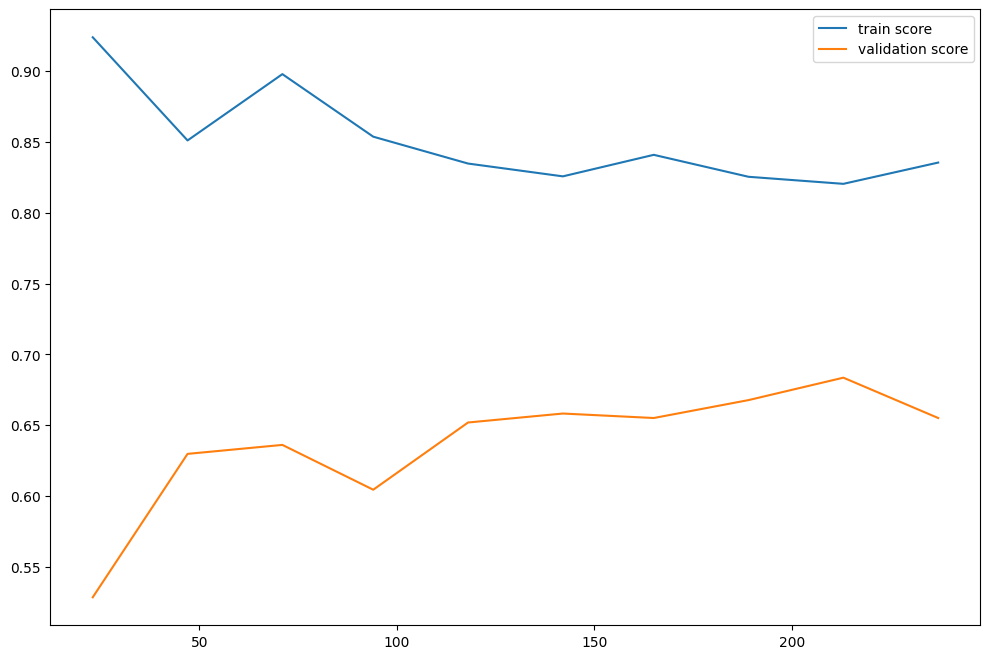

In [18]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train score')
plt.plot(N, val_score.mean(axis=1),label='validation score')
# Add legend
plt.legend()

# Show the plot
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Assuming you have X_train, X_test, y_train, y_test

svc = SVC()
s = svc.fit(X_train, y_train)

# Training set performance
train_score = s.score(X_train, y_train)
print("SVC Model Training Score:", train_score)

# Test set performance
test_score = s.score(X_test, y_test)
print("SVC Model Test Score:", test_score)

# Confusion matrix
y_pred = s.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

SVC Model Training Score: 0.680379746835443
SVC Model Test Score: 0.6582278481012658
Confusion Matrix:
[[ 0 27]
 [ 0 52]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have X_train, X_test, y_train, y_test

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train, y_train)

# Training set performance
rf_train_score = rf_model.score(X_train, y_train)
print("Random Forest Model Training Score:", rf_train_score)

# Test set performance
rf_test_score = rf_model.score(X_test, y_test)
print("Random Forest Model Test Score:", rf_test_score)

# Confusion matrix
rf_y_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)


Random Forest Model Training Score: 1.0
Random Forest Model Test Score: 0.6835443037974683
Confusion Matrix for Random Forest:
[[ 5 22]
 [ 3 49]]
